In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# Normal n of features, observations and LATEX TABLE


### CREATE DF AND PRINT

In [24]:
obs_list

[100, 500, 2500]

In [10]:
#CREATE DATA OF Synthetic datasets ETC.
obs_list = [100, 500, 2500]
features_list = [10, 30, 100]
percentage_binary = 2.0/3

n_enc_feature_dict = {}
for n_feature in features_list:
    n_encoded_features = n_feature - np.floor(n_feature*percentage_binary)
    n_enc_feature_dict[n_feature] = int((n_feature-n_encoded_features) + n_encoded_features * 3)


In [4]:
data_list = []
for obs in obs_list:
    for features in features_list:
        data_list.append([obs, features, n_enc_feature_dict[features]])

In [5]:
synth_character_df = pd.DataFrame(data_list, columns = ['Observations', 'Features', 'Features Encoded'])

In [6]:
#LATEX PRINT DataFrame for Features
print(synth_character_df.to_latex(bold_rows = True, index = False, caption = 'Number of observations and features of the synthetic dataset') )

\begin{table}
\centering
\caption{Number of observations and features of the synthetic dataset}
\begin{tabular}{rrr}
\toprule
 Observations &  Features &  Features Encoded \\
\midrule
          100 &        10 &                18 \\
          100 &        30 &                50 \\
          100 &       100 &               168 \\
          500 &        10 &                18 \\
          500 &        30 &                50 \\
          500 &       100 &               168 \\
         2500 &        10 &                18 \\
         2500 &        30 &                50 \\
         2500 &       100 &               168 \\
\bottomrule
\end{tabular}
\end{table}



# EXPERIMENTS

## LOAD DATASET AND SPLIT Synthetic AND REAL

In [6]:
output_df = pd.read_csv(r"C:\Users\bartd\Documents\Erasmus_\Jaar 4\Master Econometrie\Thesis\Optimal Trees\StrongTree\Results\test.csv")
boolean_real = ["synthetic" not in dataset_name for dataset_name in output_df.dataset] #False if index is for synthetic dataset, True otherwise
output_df_real = output_df[boolean_real]
output_df_synthetic = output_df[~np.array(boolean_real)]
output_df_real
output_df_synthetic

,approach,dataset,nrow,depth,warmstart,lambda,time_limit,status,obj_value,train_acc,gap,node_count,solving_time,cb_time_int,cb_time_int_suc,cb_counter_int,cb_counter_int_suc,test_acc,calib_acc,sample
0,BendersOCT,synthetic100_10_2.csv,75,2,1.0,0.0,600,2.0,-0.0,1.000000,0.000000,42.0,0.322687,0.142335,0.134709,19.0,17.0,1.0000,1.000000,1
1,Cart,synthetic100_10_2.csv,75,2,NaN,0.0,600,NaN,NaN,0.960000,NaN,NaN,0.003033,NaN,NaN,NaN,NaN,1.0000,0.960000,1
2,FlowOCT,synthetic100_10_2.csv,75,2,1.0,0.0,600,2.0,-0.0,1.000000,0.000000,77.0,0.533596,0.000000,0.000000,0.0,0.0,1.0000,1.000000,1
3,binOCT,synthetic100_10_2.csv,75,2,1.0,0.0,600,2.0,0.0,1.000000,0.000000,1.0,0.385108,0.000000,0.000000,0.0,0.0,1.0000,1.000000,1
4,OCT,synthetic100_10_2.csv,75,2,1.0,0.0,600,2.0,300.0,1.000000,0.000000,54.0,0.990624,0.000000,0.000000,0.0,0.0,1.0000,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1239,BendersOCT,synthetic2500_100_5.csv,1875,5,1.0,0.0,600,9.0,-inf,NaN,inf,403.0,600.218005,110.638950,110.638950,30.0,30.0,NaN,NaN,4
1240,Cart,synthetic2500_100_5.csv,1875,5,NaN,0.0,600,NaN,NaN,0.857067,NaN,NaN,0.028921,NaN,NaN,NaN,NaN,0.8336,0.888530,4
1241,FlowOCT,synthetic2500_100_5.csv,1875,5,1.0,0.0,600,9.0,-268.0,0.857067,9195.149254,1.0,711.805300,0.000000,0.000000,0.0,0.0,0.8336,0.888530,4
1242,binOCT,synthetic2500_100_5.csv,1875,5,1.0,0.0,600,9.0,266.0,0.858133,100.000000,431.0,1038.835313,0.000000,0.000000,0.0,0.0,0.8304,0.890145,4


In [10]:
# output_df_real, output_df_synthetic = analyze.split_synthetic_and_real(output_df)

idx = pd.IndexSlice
output_df_synthetic.merge(
            discovery_rate_df.loc[:, idx['approach', 'dataset', 'sample', 'tdr', 'fdr']], 
            left_on = ['dataset', 'sample', 'approach'], right_on = ['dataset', 'sample', 'approach', ])

,approach,dataset,nrow,depth,warmstart,lambda,time_limit,status,obj_value,train_acc,...,cb_time_int_suc,cb_counter_int,cb_counter_int_suc,test_acc,calib_acc,sample,tdr_x,fdr_x,tdr_y,fdr_y
0,BendersOCT,synthetic100_10_2.csv,75,2,1.0,0.0,600,2.0,-0.0,1.000000,...,0.134709,19.0,17.0,1.0000,1.000000,1,1.000000,0.000000,1.000000,0.000000
1,Cart,synthetic100_10_2.csv,75,2,NaN,0.0,600,NaN,NaN,0.960000,...,NaN,NaN,NaN,1.0000,0.960000,1,0.666667,0.333333,0.666667,0.333333
2,FlowOCT,synthetic100_10_2.csv,75,2,1.0,0.0,600,2.0,-0.0,1.000000,...,0.000000,0.0,0.0,1.0000,1.000000,1,1.000000,0.000000,1.000000,0.000000
3,binOCT,synthetic100_10_2.csv,75,2,1.0,0.0,600,2.0,0.0,1.000000,...,0.000000,0.0,0.0,1.0000,1.000000,1,1.000000,0.000000,1.000000,0.000000
4,OCT,synthetic100_10_2.csv,75,2,1.0,0.0,600,2.0,300.0,1.000000,...,0.000000,0.0,0.0,1.0000,1.000000,1,1.000000,0.000000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,BendersOCT,synthetic2500_100_5.csv,1875,5,1.0,0.0,600,9.0,-inf,NaN,...,110.638950,30.0,30.0,NaN,NaN,4,NaN,NaN,NaN,NaN
816,Cart,synthetic2500_100_5.csv,1875,5,NaN,0.0,600,NaN,NaN,0.857067,...,NaN,NaN,NaN,0.8336,0.888530,4,0.419355,0.580645,0.419355,0.580645
817,FlowOCT,synthetic2500_100_5.csv,1875,5,1.0,0.0,600,9.0,-268.0,0.857067,...,0.000000,0.0,0.0,0.8336,0.888530,4,0.419355,0.580645,0.419355,0.580645
818,binOCT,synthetic2500_100_5.csv,1875,5,1.0,0.0,600,9.0,266.0,0.858133,...,0.000000,0.0,0.0,0.8304,0.890145,4,0.387097,0.612903,0.387097,0.612903


In [8]:
discovery_rate_df = pd.read_csv(r"C:\Users\bartd\Documents\Erasmus_\Jaar 4\Master Econometrie\Thesis\Optimal Trees\StrongTree\Results\train_discovery_rate.csv", header =  0)
approach_dict = {'Benders': 'BendersOCT', 
                'Bin': 'binOCT',
                'Flow': 'FlowOCT', 
                }
discovery_rate_df['approach'] = discovery_rate_df['approach'].replace(approach_dict)
output_df_synthetic = output_df_synthetic.merge(
            discovery_rate_df.loc[:, idx['approach', 'dataset', 'sample', 'tdr', 'fdr']], 
            left_on = ['dataset', 'sample', 'approach'], right_on = ['dataset', 'sample', 'approach', ])

## Create Group Means

In [11]:
group_means = output_df_synthetic.groupby(['approach', 'dataset', 'depth'])[
            'train_acc', 'test_acc', 'solving_time', 'gap', 'tdr', 'fdr'].agg([np.mean, np.std])
group_means.loc[['BendersOCT', 'OCT'], [('test_acc', 'mean'), ('train_acc', 'mean'), ('tdr', 'mean'), ('fdr', 'mean')]]

C:\Users\bartd\AppData\Local\Temp/ipykernel_9632/523780036.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group_means = output_df_synthetic.groupby(['approach', 'dataset', 'depth'])[


test_acc train_acc       tdr       fdr
                                            mean      mean      mean      mean
approach   dataset                depth                                       
BendersOCT synthetic100_100_2.csv 2        1.000  1.000000  1.000000  0.000000
           synthetic100_100_3.csv 3        0.760  0.933333  0.464286  0.535714
           synthetic100_100_4.csv 4        0.730  0.986667  0.145833  0.825000
           synthetic100_100_5.csv 5        0.500  0.996667  0.200000  0.778205
           synthetic100_10_2.csv  2        1.000  1.000000  1.000000  0.000000
...                                          ...       ...       ...       ...
OCT        synthetic500_10_5.csv  5        0.812  0.882000  0.550000  0.368559
           synthetic500_30_2.csv  2        1.000  1.000000  1.000000  0.000000
           synthetic500_30_3.csv  3        0.976  0.984667  0.791667  0.321429
           synthetic500_30_4.csv  4        0.896  0.946000  0.607143  0.433333
           synthetic500_30_5.csv  5        0.696  0.780444  0.319376  0.609890

[72 rows x 4 columns]

## Analyze Class

In [20]:
class AnalyzeTime():
    def __init__(self, filename) -> None:
        data_path = "c:\\Users\\bartd\\Documents\\Erasmus_\\Jaar 4\\Master Econometrie\\Thesis\\Optimal Trees\\StrongTree\\Results\\"
        self.location = data_path + filename

    def load_dataset(self):
        output_df = pd.read_csv(self.location)
        return output_df

    def split_synthetic_and_real(self, output_df):
        boolean_real = ["synthetic" not in dataset_name for dataset_name in output_df.dataset] #False if index is for synthetic dataset, True otherwise
        output_df_real = output_df[boolean_real]
        output_df_synthetic = output_df[~np.array(boolean_real)]
        return output_df_real, output_df_synthetic

    def create_results(self, output_df):
        # Create a groupby object with the means of train_acc, solving time and mipgap
        group_means = output_df.groupby(['approach', 'dataset', 'depth'])[
            'train_acc', 'test_acc', 'solving_time', 'gap', 'fdr', 'tdr'].agg([np.mean, np.std])

        # Create a groupby object with nrow
        # TODO Add N-features
        group_rows = output_df.groupby(['approach', 'dataset', 'depth'])[
            'nrow'].agg([np.mean])

        # Combine Group Objects
        self.df_results = pd.concat([group_rows, group_means], axis=1)
        return self.df_results

    def add_baseline(self, output_df, df_results):
        # Add baseline Accuracy of CART
        group_means = output_df.groupby(['approach', 'dataset', 'depth'])[
            'train_acc', 'test_acc', 'solving_time', 'gap', 'fdr', 'tdr'].agg([np.mean, np.std])
        baseline_acc = group_means.loc['Cart', [('train_acc', 'mean'), ('test_acc', 'mean')]]
        df_results = pd.merge(df_results.reset_index(), baseline_acc, left_on=[
            'dataset', 'depth'], right_index=True).groupby(['approach', 'dataset', 'depth']).sum()

        df_results.columns = ['obs_count', 'mean_train_acc', 'std_train_acc', 'mean_test_acc', 'std_test_acc', 
                              'mean_solv_time', 'std_solve_time', 'mean_gap',
                              'std_gap', 'mean_tdr', 'std_tdr', 'mean_fdr', 'std_fdr',  
                              'mean_train_cart', 'mean_test_cart']
        self.df_results = df_results
        return self.df_results

    def add_n_features(self, output_df):
        output_df['features'] = [int(dataset_name.split('_')[1]) for dataset_name in output_df.dataset]
        output_df['enc_features'] = [n_enc_feature_dict[int(feature)] for feature in output_df.features]
        self.df_results = pd.merge(self.df_results.reset_index(), output_df.loc[:, ['features', 'enc_features', 'dataset']], left_on=['dataset'], right_on=['dataset'], 
         ).groupby(['approach', 'dataset', 'depth']).mean()
        return self.df_results
        

    def n_solved(self, output_df):
        output_df.status.fillna(np.inf, inplace=True)

        # If want to sort at a specific status...
        # status_df = output_df[output_df.loc[:, 'status'] == 2, :].groupby(['approach', 'dataset', 'depth'])[
        #     'status'].agg(['value_counts'])

        status_df = output_df.groupby(['approach', 'dataset', 'depth'])[
            'status'].agg(['value_counts'])
        return status_df



In [33]:
df_results = AnalyzeTime.create_results(output_df_real)
group_means = output_df.groupby(['approach', 'dataset', 'depth'])[
            'train_acc', 'test_acc', 'solving_time', 'gap'].agg([np.mean, np.std])
baseline_acc = group_means.loc['Cart', [('train_acc', 'mean'), ('test_acc', 'mean')]]
baseline_acc
df_results = pd.merge(df_results.reset_index(), baseline_acc, left_on=[
            'dataset', 'depth'], right_index=True).groupby(['approach', 'dataset', 'depth']).sum()
baseline_acc_cartCV = df_results.loc[idx['CartCV',:], [('train_acc', 'mean'), ('test_acc', 'mean')]]
pd.merge(df_results.reset_index(), baseline_acc_cartCV, left_on=['dataset'], right_on=['dataset'])
pd.merge(df_results.reset_index(), test.reset_index(), left_on=['dataset'], right_on=['dataset'])
df_results.reset_index().join(test.reset_index(), on=['dataset'])
df_results.reset_index()
# test.reset_index()

TypeError: AnalyzeTime.create_results() missing 1 required positional argument: 'output_df'

In [21]:
analyze = AnalyzeTime('test.csv')
# output_df_real, output_df_synthetic = analyze.split_synthetic_and_real(output_df)
df_results = analyze.create_results(output_df_synthetic)
df_results = analyze.add_baseline(output_df_synthetic, df_results)
df_results

C:\Users\bartd\AppData\Local\Temp/ipykernel_7564/539263800.py:18: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group_means = output_df.groupby(['approach', 'dataset', 'depth'])[
C:\Users\bartd\AppData\Local\Temp/ipykernel_7564/539263800.py:32: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group_means = output_df.groupby(['approach', 'dataset', 'depth'])[
C:\Users\bartd\AppData\Local\Temp/ipykernel_7564/539263800.py:35: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  df_results = pd.merge(df_results.reset_index(), baseline_acc, left_on=[


obs_count  mean_train_acc  \
approach   dataset                depth                              
BendersOCT synthetic100_100_2.csv 2           75.0        1.000000   
           synthetic100_100_3.csv 3           75.0        0.933333   
           synthetic100_100_4.csv 4           75.0        0.986667   
           synthetic100_100_5.csv 5           75.0        0.996667   
           synthetic100_10_2.csv  2           75.0        1.000000   
...                                            ...             ...   
binOCT     synthetic500_10_5.csv  5          375.0        0.960000   
           synthetic500_30_2.csv  2          375.0        1.000000   
           synthetic500_30_3.csv  3          375.0        0.960667   
           synthetic500_30_4.csv  4          375.0        0.943333   
           synthetic500_30_5.csv  5          375.0        0.878000   

                                         std_train_acc  mean_test_acc  \
approach   dataset                depth                                 
BendersOCT synthetic100_100_2.csv 2           0.000000          1.000   
           synthetic100_100_3.csv 3           0.018856          0.760   
           synthetic100_100_4.csv 4           0.018856          0.730   
           synthetic100_100_5.csv 5           0.006667          0.500   
           synthetic100_10_2.csv  2           0.000000          1.000   
...                                                ...            ...   
binOCT     synthetic500_10_5.csv  5           0.002177          0.904   
           synthetic500_30_2.csv  2           0.000000          1.000   
           synthetic500_30_3.csv  3           0.026432          0.932   
           synthetic500_30_4.csv  4           0.004554          0.896   
           synthetic500_30_5.csv  5           0.028337          0.754   

                                         std_test_acc  mean_solv_time  \
approach   dataset                depth                                 
BendersOCT synthetic100_100_2.csv 2          0.000000       11.953634   
           synthetic100_100_3.csv 3          0.056569      600.033315   
           synthetic100_100_4.csv 4          0.050332      303.674014   
           synthetic100_100_5.csv 5          0.095219      197.282072   
           synthetic100_10_2.csv  2          0.000000        0.404899   
...                                               ...             ...   
binOCT     synthetic500_10_5.csv  5          0.014606      610.093160   
           synthetic500_30_2.csv  2          0.000000       18.134005   
           synthetic500_30_3.csv  3          0.046418      505.535255   
           synthetic500_30_4.csv  4          0.019596      610.185987   
           synthetic500_30_5.csv  5          0.042016      630.902108   

                                         std_solve_time  mean_gap    std_gap  \
approach   dataset                depth                                        
BendersOCT synthetic100_100_2.csv 2            8.861349       0.0   0.000000   
           synthetic100_100_3.csv 3            0.008216     100.0   0.000000   
           synthetic100_100_4.csv 4          342.290582      50.0  57.735027   
           synthetic100_100_5.csv 5          282.870808      25.0  50.000000   
           synthetic100_10_2.csv  2            0.224510       0.0   0.000000   
...                                                 ...       ...        ...   
binOCT     synthetic500_10_5.csv  5            0.233599     100.0   0.000000   
           synthetic500_30_2.csv  2           26.273107       0.0   0.000000   
           synthetic500_30_3.csv  3          198.276598      75.0  50.000000   
           synthetic500_30_4.csv  4            0.380531     100.0   0.000000   
           synthetic500_30_5.csv  5           10.116912     100.0   0.000000   

                                         mean_tdr   std_tdr  mean_fdr  \
approach   dataset                depth                                 
BendersOCT synthetic100_100_2.csv 2      0.

In [29]:
analyze = AnalyzeTime('test.csv')
output_df = analyze.load_dataset() 
output_df_real, output_df_synthetic = analyze.split_synthetic_and_real(output_df)
# output_df_synthetic
idx = pd.IndexSlice
discovery_rate_df['approach'] = discovery_rate_df['approach'].replace(approach_dict)

output_df_synthetic = output_df_synthetic.merge(
            discovery_rate_df.loc[:, idx['approach', 'dataset', 'sample', 'tdr', 'fdr']], 
            left_on = ['dataset', 'sample', 'approach'], right_on = ['dataset', 'sample', 'approach', ])
output_df_synthetic

,approach,dataset,nrow,depth,warmstart,lambda,time_limit,status,obj_value,train_acc,...,solving_time,cb_time_int,cb_time_int_suc,cb_counter_int,cb_counter_int_suc,test_acc,calib_acc,sample,tdr,fdr
0,BendersOCT,synthetic100_10_2.csv,75,2,1.0,0.0,600,2.0,-0.0,1.000000,...,0.322687,0.142335,0.134709,19.0,17.0,1.0000,1.000000,1,1.000000,0.000000
1,Cart,synthetic100_10_2.csv,75,2,NaN,0.0,600,NaN,NaN,0.960000,...,0.003033,NaN,NaN,NaN,NaN,1.0000,0.960000,1,0.666667,0.333333
2,FlowOCT,synthetic100_10_2.csv,75,2,1.0,0.0,600,2.0,-0.0,1.000000,...,0.533596,0.000000,0.000000,0.0,0.0,1.0000,1.000000,1,1.000000,0.000000
3,binOCT,synthetic100_10_2.csv,75,2,1.0,0.0,600,2.0,0.0,1.000000,...,0.385108,0.000000,0.000000,0.0,0.0,1.0000,1.000000,1,1.000000,0.000000
4,OCT,synthetic100_10_2.csv,75,2,1.0,0.0,600,2.0,300.0,1.000000,...,0.990624,0.000000,0.000000,0.0,0.0,1.0000,1.000000,1,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,BendersOCT,synthetic2500_100_5.csv,1875,5,1.0,0.0,600,9.0,-inf,NaN,...,600.218005,110.638950,110.638950,30.0,30.0,NaN,NaN,4,NaN,NaN
756,Cart,synthetic2500_100_5.csv,1875,5,NaN,0.0,600,NaN,NaN,0.857067,...,0.028921,NaN,NaN,NaN,NaN,0.8336,0.888530,4,0.419355,0.580645
757,FlowOCT,synthetic2500_100_5.csv,1875,5,1.0,0.0,600,9.0,-268.0,0.857067,...,711.805300,0.000000,0.000000,0.0,0.0,0.8336,0.888530,4,0.419355,0.580645
758,binOCT,synthetic2500_100_5.csv,1875,5,1.0,0.0,600,9.0,266.0,0.858133,...,1038.835313,0.000000,0.000000,0.0,0.0,0.8304,0.890145,4,0.387097,0.612903


In [30]:
analyze = AnalyzeTime('test.csv')
output_df = analyze.load_dataset() 
output_df_real, output_df_synthetic = analyze.split_synthetic_and_real(output_df)

idx = pd.IndexSlice
discovery_rate_df['approach'] = discovery_rate_df['approach'].replace(approach_dict)
output_df_synthetic = output_df_synthetic.merge(
            discovery_rate_df.loc[:, idx['approach', 'dataset', 'sample', 'tdr', 'fdr']], 
            left_on = ['dataset', 'sample', 'approach'], right_on = ['dataset', 'sample', 'approach', ])



#Create DF With Features 
df_results = analyze.create_results(output_df_synthetic)
df_results = analyze.add_baseline(output_df_synthetic, df_results)
df_results = analyze.add_n_features(output_df_synthetic) #Add n of features

status_df = analyze.n_solved(output_df) #How many instances are solved

df_results
# df_results.loc[idx[['BendersOCT', 'Cart', 'FlowOCT', 'OCT', 'binOCT']],:].to_csv(
#     r'C:\Users\bartd\Documents\Erasmus_\Jaar 4\Master Econometrie\Thesis\Optimal Trees\StrongTree\Results\aresults_df_time_experiment_synthetic.csv')

C:\Users\bartd\AppData\Local\Temp/ipykernel_7564/539263800.py:18: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group_means = output_df.groupby(['approach', 'dataset', 'depth'])[
C:\Users\bartd\AppData\Local\Temp/ipykernel_7564/539263800.py:32: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group_means = output_df.groupby(['approach', 'dataset', 'depth'])[
C:\Users\bartd\AppData\Local\Temp/ipykernel_7564/539263800.py:35: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  df_results = pd.merge(df_results.reset_index(), baseline_acc, left_on=[


obs_count  mean_train_acc  \
approach   dataset                depth                              
BendersOCT synthetic100_100_2.csv 2           75.0        1.000000   
           synthetic100_100_3.csv 3           75.0        0.933333   
           synthetic100_100_4.csv 4           75.0        0.986667   
           synthetic100_100_5.csv 5           75.0        0.996667   
           synthetic100_10_2.csv  2           75.0        1.000000   
...                                            ...             ...   
binOCT     synthetic500_10_5.csv  5          375.0        0.960000   
           synthetic500_30_2.csv  2          375.0        1.000000   
           synthetic500_30_3.csv  3          375.0        0.960667   
           synthetic500_30_4.csv  4          375.0        0.943333   
           synthetic500_30_5.csv  5          375.0        0.878000   

                                         std_train_acc  mean_test_acc  \
approach   dataset                depth                                 
BendersOCT synthetic100_100_2.csv 2           0.000000          1.000   
           synthetic100_100_3.csv 3           0.018856          0.760   
           synthetic100_100_4.csv 4           0.018856          0.730   
           synthetic100_100_5.csv 5           0.006667          0.500   
           synthetic100_10_2.csv  2           0.000000          1.000   
...                                                ...            ...   
binOCT     synthetic500_10_5.csv  5           0.002177          0.904   
           synthetic500_30_2.csv  2           0.000000          1.000   
           synthetic500_30_3.csv  3           0.026432          0.932   
           synthetic500_30_4.csv  4           0.004554          0.896   
           synthetic500_30_5.csv  5           0.028337          0.754   

                                         std_test_acc  mean_solv_time  \
approach   dataset                depth                                 
BendersOCT synthetic100_100_2.csv 2          0.000000       11.953634   
           synthetic100_100_3.csv 3          0.056569      600.033315   
           synthetic100_100_4.csv 4          0.050332      303.674014   
           synthetic100_100_5.csv 5          0.095219      197.282072   
           synthetic100_10_2.csv  2          0.000000        0.404899   
...                                               ...             ...   
binOCT     synthetic500_10_5.csv  5          0.014606      610.093160   
           synthetic500_30_2.csv  2          0.000000       18.134005   
           synthetic500_30_3.csv  3          0.046418      505.535255   
           synthetic500_30_4.csv  4          0.019596      610.185987   
           synthetic500_30_5.csv  5          0.042016      630.902108   

                                         std_solve_time  mean_gap    std_gap  \
approach   dataset                depth                                        
BendersOCT synthetic100_100_2.csv 2            8.861349       0.0   0.000000   
           synthetic100_100_3.csv 3            0.008216     100.0   0.000000   
           synthetic100_100_4.csv 4          342.290582      50.0  57.735027   
           synthetic100_100_5.csv 5          282.870808      25.0  50.000000   
           synthetic100_10_2.csv  2            0.224510       0.0   0.000000   
...                                                 ...       ...        ...   
binOCT     synthetic500_10_5.csv  5            0.233599     100.0   0.000000   
           synthetic500_30_2.csv  2           26.273107       0.0   0.000000   
           synthetic500_30_3.csv  3          198.276598      75.0  50.000000   
           synthetic500_30_4.csv  4            0.380531     100.0   0.000000   
           synthetic500_30_5.csv  5           10.116912     100.0   0.000000   

                                         mean_tdr   std_tdr  mean_fdr  \
approach   dataset                depth                                 
BendersOCT synthetic100_100_2.csv 2      0.

In [38]:
#  df_results.loc[idx['CartCV',:], [('train_acc', 'mean'), ('test_acc', 'mean')]]
df_results

obs_count  mean_train_acc  \
approach   dataset                depth                              
BendersOCT synthetic100_100_2.csv 2           75.0        1.000000   
           synthetic100_100_3.csv 3           75.0        0.933333   
           synthetic100_100_4.csv 4           75.0        0.986667   
           synthetic100_100_5.csv 5           75.0        0.996667   
           synthetic100_10_2.csv  2           75.0        1.000000   
...                                            ...             ...   
binOCT     synthetic500_10_5.csv  5          375.0        0.960000   
           synthetic500_30_2.csv  2          375.0        1.000000   
           synthetic500_30_3.csv  3          375.0        0.960667   
           synthetic500_30_4.csv  4          375.0        0.943333   
           synthetic500_30_5.csv  5          375.0        0.878000   

                                         std_train_acc  mean_test_acc  \
approach   dataset                depth                                 
BendersOCT synthetic100_100_2.csv 2           0.000000          1.000   
           synthetic100_100_3.csv 3           0.018856          0.760   
           synthetic100_100_4.csv 4           0.018856          0.730   
           synthetic100_100_5.csv 5           0.006667          0.500   
           synthetic100_10_2.csv  2           0.000000          1.000   
...                                                ...            ...   
binOCT     synthetic500_10_5.csv  5           0.002177          0.904   
           synthetic500_30_2.csv  2           0.000000          1.000   
           synthetic500_30_3.csv  3           0.026432          0.932   
           synthetic500_30_4.csv  4           0.004554          0.896   
           synthetic500_30_5.csv  5           0.028337          0.754   

                                         std_test_acc  mean_solv_time  \
approach   dataset                depth                                 
BendersOCT synthetic100_100_2.csv 2          0.000000       11.953634   
           synthetic100_100_3.csv 3          0.056569      600.033315   
           synthetic100_100_4.csv 4          0.050332      303.674014   
           synthetic100_100_5.csv 5          0.095219      197.282072   
           synthetic100_10_2.csv  2          0.000000        0.404899   
...                                               ...             ...   
binOCT     synthetic500_10_5.csv  5          0.014606      610.093160   
           synthetic500_30_2.csv  2          0.000000       18.134005   
           synthetic500_30_3.csv  3          0.046418      505.535255   
           synthetic500_30_4.csv  4          0.019596      610.185987   
           synthetic500_30_5.csv  5          0.042016      630.902108   

                                         std_solve_time  mean_gap    std_gap  \
approach   dataset                depth                                        
BendersOCT synthetic100_100_2.csv 2            8.861349       0.0   0.000000   
           synthetic100_100_3.csv 3            0.008216     100.0   0.000000   
           synthetic100_100_4.csv 4          342.290582      50.0  57.735027   
           synthetic100_100_5.csv 5          282.870808      25.0  50.000000   
           synthetic100_10_2.csv  2            0.224510       0.0   0.000000   
...                                                 ...       ...        ...   
binOCT     synthetic500_10_5.csv  5            0.233599     100.0   0.000000   
           synthetic500_30_2.csv  2           26.273107       0.0   0.000000   
           synthetic500_30_3.csv  3          198.276598      75.0  50.000000   
           synthetic500_30_4.csv  4            0.380531     100.0   0.000000   
           synthetic500_30_5.csv  5           10.116912     100.0   0.000000   

                                         mean_tdr   std_tdr  mean_fdr  \
approach   dataset                depth                                 
BendersOCT synthetic100_100_2.csv 2      0.

### Results DF to Latex Table

In [15]:
output_df_synthetic.columns

Index(['approach', 'dataset', 'nrow', 'depth', 'warmstart', 'lambda',
       'time_limit', 'status', 'obj_value', 'train_acc', 'gap', 'node_count',
       'solving_time', 'cb_time_int', 'cb_time_int_suc', 'cb_counter_int',
       'cb_counter_int_suc', 'test_acc', 'calib_acc', 'sample', 'tdr', 'fdr',
       'features', 'enc_features'],
      dtype='object')

In [16]:
output_df_synthetic.pivot_table(columns = 'approach' , index = ['depth', 'nrow', 'features' ], values = ['train_acc', 'test_acc', 'fdr', 'tdr', 'solving_time'], aggfunc = ['mean', 'std'])


mean                                          \
                           fdr                                           
approach            BendersOCT      Cart   FlowOCT       OCT    binOCT   
depth nrow features                                                      
2     75   10         0.000000  0.333333  0.083333  0.000000  0.083333   
           30         0.000000  0.333333  0.000000  0.000000  0.000000   
           100        0.000000  0.333333  0.000000  0.000000  0.000000   
      375  10         0.000000  0.333333  0.000000  0.000000  0.000000   
           30         0.000000  0.333333  0.000000  0.000000  0.000000   
           100        0.000000  0.083333  0.166667  0.000000  0.000000   
      1875 10         0.000000  0.333333  0.000000  0.000000  0.000000   
           30         0.000000  0.333333  0.166667  0.250000  0.083333   
           100        0.083333  0.166667  0.166667  0.166667  0.166667   
3     75   10         0.071429  0.291667  0.107143  0.142857  0.142857   
           30         0.000000  0.464286  0.285714  0.214286  0.428571   
           100        0.535714  0.690476  0.535714  0.500000  0.392857   
      375  10         0.000000  0.333333  0.035714  0.285714  0.035714   
           30         0.255952  0.214286  0.327381  0.321429  0.357143   
           100        0.428571  0.321429  0.214286  0.321429  0.357143   
      1875 10         0.000000  0.357143  0.071429  0.285714  0.000000   
           30         0.321429  0.321429  0.321429  0.321429  0.321429   
           100        0.285714  0.285714  0.285714  0.285714  0.285714   
4     75   10         0.339286  0.290909  0.339286  0.400000  0.383333   
           30         0.573810  0.599432  0.538828  0.550000  0.666667   
           100        0.825000  0.834821  0.826311  0.883333  0.866667   
      375  10         0.391667  0.450321  0.410256  0.433333  0.416667   
           30         0.551282  0.416667  0.400000  0.433333  0.416667   
           100        0.932143  0.445779  0.445779  0.400000  0.533333   
      1875 10         0.366667  0.400000  0.376923  0.400000  0.333333   
           30         0.483333  0.483333  0.483333  0.466667  0.466667   
           100        0.925000  0.440476  0.440476  0.444444  0.450000   
5     75   10         0.503587  0.278603  0.427717  0.543882  0.548387   
           30         0.702055  0.347378  0.649954  0.714839  0.693548   
           100        0.778205  0.749466  0.714560  0.923871  0.895161   
      375  10         0.354839  0.229808  0.269415  0.368559  0.306452   
           30         0.557258  0.417964  0.413640  0.609890  0.419355   
           100        0.826405  0.620894  0.603091  0.974359  0.660050   
      1875 10         0.406720  0.423387  0.382796  0.408602  0.379032   
           30         0.362007  0.362366  0.351254  0.354839  0.365591   
           100        0.920123  0.540323  0.540323  0.540323  0.548387   

                                                                     \
                    solving_time                                      
approach              BendersOCT      Cart      FlowOCT         OCT   
depth nrow features                                                   
2     75   10           0.404899  0.002503     0.622779    0.930991   
           30           3.945551  0.002733     1.759148    4.316882   
           100         11.953634  0.003811    57.561477    7.643438   
      375  10           1.565451  0.002812     5.416909   10.976614   
           30           5.631117  0.002493    48.113013   20.789619   
           100        114.074371  0.018232   827.860801  475.035970   
      1875 10           8.918316  0.002753    11.134068  193.113102   
           30          59.038942  0.006623   529.888852  591.275266   
           100        497.312269  0.010963   612.547743  615.411295   
3     75   10          20.542039  0.003989    72.838835  157.985034   
           30         171.170058  0.002744   600.371654  464.894342   


In [18]:
df_synthetic_pivot = output_df_synthetic.pivot_table(columns = 'approach', index = ['depth', 'nrow', 'features' ], values = ['train_acc', 'test_acc', 'solving_time', 'fdr', 'tdr'], aggfunc = ['mean', 'std'])
df_synthetic_pivot = df_synthetic_pivot.swaplevel(0,2, axis = 1)
df_synthetic_pivot

approach            BendersOCT      Cart   FlowOCT       OCT    binOCT  \
                           fdr       fdr       fdr       fdr       fdr   
                          mean      mean      mean      mean      mean   
depth nrow features                                                      
2     75   10         0.000000  0.333333  0.083333  0.000000  0.083333   
           30         0.000000  0.333333  0.000000  0.000000  0.000000   
           100        0.000000  0.333333  0.000000  0.000000  0.000000   
      375  10         0.000000  0.333333  0.000000  0.000000  0.000000   
           30         0.000000  0.333333  0.000000  0.000000  0.000000   
           100        0.000000  0.083333  0.166667  0.000000  0.000000   
      1875 10         0.000000  0.333333  0.000000  0.000000  0.000000   
           30         0.000000  0.333333  0.166667  0.250000  0.083333   
           100        0.083333  0.166667  0.166667  0.166667  0.166667   
3     75   10         0.071429  0.291667  0.107143  0.142857  0.142857   
           30         0.000000  0.464286  0.285714  0.214286  0.428571   
           100        0.535714  0.690476  0.535714  0.500000  0.392857   
      375  10         0.000000  0.333333  0.035714  0.285714  0.035714   
           30         0.255952  0.214286  0.327381  0.321429  0.357143   
           100        0.428571  0.321429  0.214286  0.321429  0.357143   
      1875 10         0.000000  0.357143  0.071429  0.285714  0.000000   
           30         0.321429  0.321429  0.321429  0.321429  0.321429   
           100        0.285714  0.285714  0.285714  0.285714  0.285714   
4     75   10         0.339286  0.290909  0.339286  0.400000  0.383333   
           30         0.573810  0.599432  0.538828  0.550000  0.666667   
           100        0.825000  0.834821  0.826311  0.883333  0.866667   
      375  10         0.391667  0.450321  0.410256  0.433333  0.416667   
           30         0.551282  0.416667  0.400000  0.433333  0.416667   
           100        0.932143  0.445779  0.445779  0.400000  0.533333   
      1875 10         0.366667  0.400000  0.376923  0.400000  0.333333   
           30         0.483333  0.483333  0.483333  0.466667  0.466667   
           100        0.925000  0.440476  0.440476  0.444444  0.450000   
5     75   10         0.503587  0.278603  0.427717  0.543882  0.548387   
           30         0.702055  0.347378  0.649954  0.714839  0.693548   
           100        0.778205  0.749466  0.714560  0.923871  0.895161   
      375  10         0.354839  0.229808  0.269415  0.368559  0.306452   
           30         0.557258  0.417964  0.413640  0.609890  0.419355   
           100        0.826405  0.620894  0.603091  0.974359  0.660050   
      1875 10         0.406720  0.423387  0.382796  0.408602  0.379032   
           30         0.362007  0.362366  0.351254  0.354839  0.365591   
           100        0.920123  0.540323  0.540323  0.540323  0.548387   

approach              BendersOCT         Cart      FlowOCT          OCT  \
                    solving_time solving_time solving_time solving_time   
                            mean         mean         mean         mean   
depth nrow features                                                       
2     75   10           0.404899     0.002503     0.622779     0.930991   
           30           3.945551     0.002733     1.759148     4.316882   
           100         11.953634     0.003811    57.561477     7.643438   
      375  10           1.565451     0.002812     5.416909    10.976614   
           30           5.631117     0.002493    48.113013    20.789619   
           100        114.074371     0.018232   827.860801   475.035970   
      1875 10           8.918316     0.002753    11.134068   193.113102   
           30          59.038942     0.006623   529.888852   591.275266   
           100        497.312269     0.010963   612.547743   615.411295   
3     75   10          20.542039     0.003989    72.838835   157

In [37]:
cart_accuracy = df_synthetic_pivot.loc[:,idx['Cart','test_acc','mean']]
_cart_subtracted_accuracy = df_synthetic_pivot.loc[:,idx[:,'test_acc','mean']].sub(cart_accuracy, axis = 0)
print(_cart_subtracted_accuracy.mean())
print(_cart_subtracted_accuracy.mean().sum()/4)



approach                  
BendersOCT  test_acc  mean    0.035878
Cart        test_acc  mean    0.000000
FlowOCT     test_acc  mean    0.041811
OCT         test_acc  mean    0.038363
binOCT      test_acc  mean    0.041839
dtype: float64
0.0394730056980057


depth  nrow  features
2      75    10          (BendersOCT, test_acc, mean)
             30          (BendersOCT, test_acc, mean)
             100         (BendersOCT, test_acc, mean)
       375   10          (BendersOCT, test_acc, mean)
             30          (BendersOCT, test_acc, mean)
             100         (BendersOCT, test_acc, mean)
       1875  10          (BendersOCT, test_acc, mean)
             30          (BendersOCT, test_acc, mean)
             100         (BendersOCT, test_acc, mean)
3      75    10          (BendersOCT, test_acc, mean)
             30          (BendersOCT, test_acc, mean)
             100                (OCT, test_acc, mean)
       375   10          (BendersOCT, test_acc, mean)
             30          (BendersOCT, test_acc, mean)
             100            (FlowOCT, test_acc, mean)
       1875  10          (BendersOCT, test_acc, mean)
             30          (BendersOCT, test_acc, mean)
             100         (BendersOCT, test_acc, mean)
4     

In [19]:
# df_synthetic_pivot.loc[:,idx[:,'solving_time','mean']]
idx = pd.IndexSlice
df_synthetic_pivot.loc[:,idx[:,['tdr', 'fdr'],:]]

approach            BendersOCT      Cart   FlowOCT       OCT    binOCT  \
                           tdr       tdr       tdr       tdr       tdr   
                          mean      mean      mean      mean      mean   
depth nrow features                                                      
2     75   10         1.000000  0.666667  0.916667  1.000000  0.916667   
           30         1.000000  0.666667  1.000000  1.000000  1.000000   
           100        1.000000  0.666667  1.000000  1.000000  1.000000   
      375  10         1.000000  0.666667  1.000000  1.000000  1.000000   
           30         1.000000  0.666667  1.000000  1.000000  1.000000   
           100        1.000000  0.916667  0.833333  1.000000  1.000000   
      1875 10         1.000000  0.666667  1.000000  1.000000  1.000000   
           30         1.000000  0.666667  0.833333  0.750000  0.916667   
           100        0.916667  0.833333  0.833333  0.833333  0.833333   
3     75   10         1.000000  0.708333  1.000000  1.000000  1.000000   
           30         1.000000  0.535714  0.714286  0.785714  0.571429   
           100        0.464286  0.285714  0.464286  0.500000  0.607143   
      375  10         0.964286  0.571429  0.964286  0.714286  0.964286   
           30         0.833333  0.833333  0.750000  0.791667  0.750000   
           100        0.571429  0.678571  0.785714  0.678571  0.642857   
      1875 10         1.000000  0.642857  0.928571  0.714286  1.000000   
           30         0.678571  0.678571  0.678571  0.678571  0.678571   
           100        0.714286  0.714286  0.714286  0.714286  0.714286   
4     75   10         0.696429  0.517857  0.660714  0.642857  0.660714   
           30         0.520833  0.333333  0.541667  0.562500  0.416667   
           100        0.145833  0.104167  0.145833  0.145833  0.166667   
      375  10         0.692308  0.557692  0.634615  0.615385  0.673077   
           30         0.464286  0.625000  0.642857  0.607143  0.625000   
           100        0.071429  0.535714  0.535714  0.642857  0.500000   
      1875 10         0.633333  0.600000  0.600000  0.600000  0.666667   
           30         0.516667  0.516667  0.516667  0.533333  0.533333   
           100        0.066667  0.550000  0.550000  0.555556  0.550000   
5     75   10         0.794118  0.470588  0.735294  0.750000  0.823529   
           30         0.546875  0.468750  0.562500  0.500000  0.593750   
           100        0.200000  0.183333  0.283333  0.133333  0.216667   
      375  10         0.666667  0.641667  0.700000  0.550000  0.716667   
           30         0.477217  0.557882  0.567118  0.319376  0.638239   
           100        0.184066  0.359890  0.376374  0.011905  0.376374   
      1875 10         0.629310  0.612069  0.655172  0.632184  0.663793   
           30         0.644444  0.644444  0.655556  0.666667  0.655556   
           100        0.075269  0.459677  0.459677  0.459677  0.451613   

approach            BendersOCT      Cart   FlowOCT       OCT    binOCT  \
                           tdr       tdr       tdr       tdr       tdr   
                           std       std       std       std       std   
depth nrow features                                                      
2     75   10         0.000000  0.000000  0.166667  0.000000  0.166667   
           30         0.000000  0.000000  0.000000  0.000000  0.000000   
           100        0.000000  0.000000  0.000000  0.000000  0.000000   
      375  10         0.000000  0.000000  0.000000  0.000000  0.000000   
           30         0.000000  0.000000  0.000000  0.000000  0.000000   
           100        0.000000  0.166667  0.192450  0.000000  0.000000   
      1875 10         0.000000  0.000000  0.000000  0.000000  0.000000   
           30         0.000000  0.000000  0.192450  0.166667  0.166667   
           100        0.166667  0.192450  0.192450  0.192450  0.192450   
3     75   10         0.000000  0.083333  0.000000  0.000000  0.000000   
   

In [21]:
idx = pd.IndexSlice
df_synthetic_pivot.loc[:,idx[:,'solving_time','mean']]
depths = [2,3,4,5]
nrows = [75,375,1875]
features = [10,30,100]

df_rt_increase_depth = pd.DataFrame({})
df_rt_increase_size = pd.DataFrame({})
df_rt_increase_features = pd.DataFrame({})

for depth in depths:
    for idx_row,nrow in enumerate(nrows):
        for idx_feature, feature in enumerate(features):
            if depth != 5:
                a = (df_synthetic_pivot.loc[idx[depth, nrow, feature], idx[:,'solving_time','mean']])
                b = (df_synthetic_pivot.loc[idx[depth+1, nrow, feature], idx[:,'solving_time','mean']])
                df_rt_increase_depth[depth, nrow, feature] =b/a
            if nrow != 1875:
                a = (df_synthetic_pivot.loc[idx[depth, nrows[idx_row], feature], idx[:,'solving_time','mean']])
                b = (df_synthetic_pivot.loc[idx[depth, nrows[idx_row+1], feature], idx[:,'solving_time','mean']])
                df_rt_increase_size[depth, nrow, feature] =b/a
            if feature != 100:
                a = (df_synthetic_pivot.loc[idx[depth, nrow, features[idx_feature]], idx[:,'solving_time','mean']])
                b = (df_synthetic_pivot.loc[idx[depth, nrow, features[idx_feature+1]], idx[:,'solving_time','mean']])
                df_rt_increase_features[depth, nrow, feature] = b/a


In [1]:
df_rt_increase_depth
# df_rt_increase_depth

NameError: name 'df_rt_increase_depth' is not defined

In [27]:
df_rt_increase_size.columns = pd.MultiIndex.from_tuples(df_rt_increase_size.columns)
df_rt_increase_size.loc[:, idx[3,:,10]]
print(df_rt_increase_size.loc[idx[['BendersOCT', 'FlowOCT', 'OCT', 'binOCT'],:,:],idx[:,:, :]].mean(axis = 1))
print(df_rt_increase_size.loc[idx[['BendersOCT', 'FlowOCT', 'OCT', 'binOCT'],:,:],idx[:,:, :]].mean().mean())

print(df_rt_increase_size.loc[idx[['BendersOCT', 'FlowOCT', 'OCT', 'binOCT'],:,:],idx[:,:, :]].std().std())

approach                      
BendersOCT  solving_time  mean    3.020276
FlowOCT     solving_time  mean    4.223732
OCT         solving_time  mean    6.584686
binOCT      solving_time  mean    2.719007
dtype: float64
4.136925123778521
5.817394415685213


In [28]:
df_rt_increase_depth.columns = pd.MultiIndex.from_tuples(df_rt_increase_depth.columns)
df_rt_increase_depth.loc[:, idx[2, :,:]]
print(df_rt_increase_depth.loc[idx[['BendersOCT', 'FlowOCT', 'OCT', 'binOCT'],:,:],idx[:,:, :]].mean(axis = 1))
print(df_rt_increase_depth.loc[idx[['BendersOCT', 'FlowOCT', 'OCT', 'binOCT'],:,:],idx[:,:, :]].mean().mean())

print(df_rt_increase_depth.loc[idx[['BendersOCT', 'FlowOCT', 'OCT', 'binOCT'],:,:],idx[:,:, :]].std().std())


approach                      
BendersOCT  solving_time  mean    11.790952
FlowOCT     solving_time  mean    21.087398
OCT         solving_time  mean    16.036480
binOCT      solving_time  mean    12.377655
dtype: float64
15.323121275085969
27.852620327207216


In [29]:
df_rt_increase_features.columns = pd.MultiIndex.from_tuples(df_rt_increase_features.columns)
print(df_rt_increase_features.loc[idx[['BendersOCT', 'FlowOCT', 'OCT', 'binOCT'],:,:],idx[:,:, :]].mean(axis =1 ))
print(df_rt_increase_features.loc[idx[['BendersOCT', 'FlowOCT', 'OCT', 'binOCT'],:,:],idx[:,:, :]].mean().mean())


print(df_rt_increase_features.loc[idx[['BendersOCT', 'FlowOCT', 'OCT', 'binOCT'],:,:],idx[:,:, :]].std())
# df_rt_increase_features.loc[:,idx[3,75, :]]

approach                      
BendersOCT  solving_time  mean    4.731532
FlowOCT     solving_time  mean    5.893824
OCT         solving_time  mean    2.406223
binOCT      solving_time  mean    3.977306
dtype: float64
4.252221354990734
2  75    10     5.708447
         30    14.872719
   375   10     3.028144
         30     4.747988
   1875  10    20.251300
         30     3.523520
3  75    10     2.543414
         30     1.325088
   375   10     8.669092
         30     1.082847
   1875  10     4.368536
         30     0.034096
4  75    10     0.341250
         30     0.204481
   375   10     0.117715
         30     0.017403
   1875  10     0.032884
         30     1.089058
5  75    10     1.948987
         30     0.670580
   375   10     0.232393
         30     0.181533
   1875  10     0.070348
         30     0.407569
dtype: float64


In [19]:
# df_real_pivot.groupby(df_real_pivot.columns.str[-1], axis=1).apply(lambda x: x.astype(str).apply('±'.join, 1))
df_synthetic_pivot = round(df_synthetic_pivot, 2)

df_sliced = df_synthetic_pivot.loc[:, idx[['BendersOCT', 'Cart', 'FlowOCT', 'OCT', 'binOCT'], 'solving_time', : ]]
# df_sliced = df_real_pivot.loc[idx[:,[2,3,4,5]], idx[['BendersOCT', 'Cart', 'FlowOCT', 'OCT', 'binOCT'], 'train_acc', : ]]
df_sliced = df_sliced.groupby(level = [0,1], axis = 1).apply(lambda x: x.astype(str).apply('$\pm$'.join, 1))
# df_sliced = df_sliced.rename(dataset_names)
df_sliced = df_sliced.reset_index().droplevel(1, axis = 1)
df_sliced

approach,depth,nrow,features,BendersOCT,Cart,FlowOCT,OCT,binOCT
0,2,75,10,0.4$\pm$0.22,0.0$\pm$0.0,0.62$\pm$0.21,0.93$\pm$0.6,0.57$\pm$0.14
1,2,75,30,3.95$\pm$2.62,0.0$\pm$0.0,1.76$\pm$0.97,4.32$\pm$2.97,8.82$\pm$5.98
2,2,75,100,11.95$\pm$8.86,0.0$\pm$0.0,57.56$\pm$38.26,7.64$\pm$6.91,38.39$\pm$58.73
3,2,375,10,1.57$\pm$0.31,0.0$\pm$0.0,5.42$\pm$2.47,10.98$\pm$5.2,3.06$\pm$2.38
4,2,375,30,5.63$\pm$3.66,0.0$\pm$0.0,48.11$\pm$39.54,20.79$\pm$11.52,18.13$\pm$26.27
5,2,1875,10,8.92$\pm$3.34,0.0$\pm$0.0,11.13$\pm$4.51,193.11$\pm$25.71,13.61$\pm$8.38
6,2,1875,30,59.04$\pm$91.04,0.01$\pm$0.0,529.89$\pm$89.34,591.28$\pm$28.21,296.95$\pm$221.27
7,3,75,10,20.54$\pm$26.28,0.0$\pm$0.0,72.84$\pm$55.95,157.99$\pm$110.73,82.54$\pm$99.72
8,3,75,30,171.17$\pm$237.02,0.0$\pm$0.0,600.37$\pm$0.02,464.89$\pm$222.72,593.97$\pm$13.86
9,3,75,100,600.03$\pm$0.01,0.0$\pm$0.0,404.96$\pm$236.98,510.3$\pm$183.5,511.92$\pm$182.71


In [167]:
slice_ = ['BendersOCT', 'Cart', 'FlowOCT', 'OCT', 'binOCT']
sliced_table = df_sliced.style.highlight_max(axis = 1,props = 'textbf:--rwrap;', subset = slice_)
sliced_table.hide_index()
sliced_table_latex = sliced_table.to_latex(column_format = 'rrrrrrr', position = 'ht!', position_float ='centering', hrules = True, 
                    multirow_align="t", multicol_align="r", caption = 'Number of observations and features of the datasets used')
# print((df_sliced.style.highlight_max(axis = 1,props = 'textbf:--rwrap;')).to_latex(caption = 'Number of observations and features of the datasets used') )
print(sliced_table_latex)

\begin{table}[ht!]
\centering
\caption{Number of observations and features of the datasets used}
\begin{tabular}{rrrrrrr}
\toprule
{depth} & {nrow} & {features} & {BendersOCT} & {Cart} & {FlowOCT} & {OCT} & {binOCT} \\
\midrule
2 & 75 & 10 & \textbf{1.0$\pm$0.0} & 0.97$\pm$0.01 & \textbf{1.0$\pm$0.0} & \textbf{1.0$\pm$0.0} & \textbf{1.0$\pm$0.0} \\
2 & 75 & 30 & \textbf{1.0$\pm$0.0} & 0.86$\pm$0.01 & \textbf{1.0$\pm$0.0} & \textbf{1.0$\pm$0.0} & \textbf{1.0$\pm$0.0} \\
2 & 75 & 100 & \textbf{1.0$\pm$0.0} & 0.91$\pm$0.02 & \textbf{1.0$\pm$0.0} & \textbf{1.0$\pm$0.0} & \textbf{1.0$\pm$0.0} \\
2 & 375 & 10 & \textbf{1.0$\pm$0.0} & 0.87$\pm$0.01 & \textbf{1.0$\pm$0.0} & \textbf{1.0$\pm$0.0} & \textbf{1.0$\pm$0.0} \\
2 & 375 & 30 & \textbf{1.0$\pm$0.0} & 0.92$\pm$0.01 & \textbf{1.0$\pm$0.0} & \textbf{1.0$\pm$0.0} & \textbf{1.0$\pm$0.0} \\
2 & 1875 & 10 & \textbf{1.0$\pm$0.0} & 0.92$\pm$0.0 & \textbf{1.0$\pm$0.0} & \textbf{1.0$\pm$0.0} & \textbf{1.0$\pm$0.0} \\
2 & 1875 & 30 & \textbf{1.0$\p

In [263]:
df_sliced = df_synthetic_pivot.loc[:, idx[['BendersOCT', 'Cart', 'FlowOCT', 'OCT', 'binOCT'], 'fdr', : ]]
df_sliced = df_sliced.groupby(level = [0,1], axis = 1).apply(lambda x: x.astype(str).apply('$\pm$'.join, 1))
df_sliced = df_sliced.reset_index().droplevel(1, axis = 1)

approach,depth,nrow,features,BendersOCT,Cart,FlowOCT,OCT,binOCT
0,2,75,10,0.0$\pm$0.0,0.3333333333333333$\pm$0.0,0.08333333333333333$\pm$0.16666666666666666,0.0$\pm$0.0,0.08333333333333333$\pm$0.16666666666666666
1,2,75,30,0.0$\pm$0.0,0.3333333333333333$\pm$0.0,0.0$\pm$0.0,0.0$\pm$0.0,0.0$\pm$0.0
2,2,75,100,0.0$\pm$0.0,0.3333333333333333$\pm$0.0,0.0$\pm$0.0,0.0$\pm$0.0,0.0$\pm$0.0
3,2,375,10,0.0$\pm$0.0,0.3333333333333333$\pm$0.0,0.0$\pm$0.0,0.0$\pm$0.0,0.0$\pm$0.0
4,2,375,30,0.0$\pm$0.0,0.3333333333333333$\pm$0.0,0.0$\pm$0.0,0.0$\pm$0.0,0.0$\pm$0.0
5,2,1875,10,0.0$\pm$0.0,0.3333333333333333$\pm$0.0,0.0$\pm$0.0,0.0$\pm$0.0,0.0$\pm$0.0
6,2,1875,30,0.0$\pm$0.0,0.3333333333333333$\pm$0.0,0.16666666666666666$\pm$0.19245008972987526,0.25$\pm$0.16666666666666666,0.08333333333333333$\pm$0.16666666666666666
7,3,75,10,0.0714285714285714$\pm$0.08247860988423221,0.29166666666666663$\pm$0.08333333333333336,0.1071428571428571$\pm$0.0714285714285714,0.1428571428571428$\pm$0.0,0.1428571428571428$\pm$0.0
8,3,75,30,0.0$\pm$0.0,0.46428571428571425$\pm$0.24397501823713333,0.2857142857142857$\pm$0.20203050891044216,0.21428571428571427$\pm$0.3400680204068024,0.42857142857142855$\pm$0.3688555567816587
9,3,75,100,0.5357142857142857$\pm$0.07142857142857145,0.6904761904761905$\pm$0.35951592548908334,0.5357142857142857$\pm$0.2439750182371333,0.49999999999999994$\pm$0.24743582965269675,0.3928571428571428$\pm$0.2704242069428701


In [268]:
# df_real_pivot.groupby(df_real_pivot.columns.str[-1], axis=1).apply(lambda x: x.astype(str).apply('±'.join, 1))
df_synthetic_pivot = round(df_synthetic_pivot, 2)

df_sliced = df_synthetic_pivot.loc[:, idx[['BendersOCT', 'Cart', 'FlowOCT', 'OCT', 'binOCT'], 'fdr', : ]]
# df_sliced = df_real_pivot.loc[idx[:,[2,3,4,5]], idx[['BendersOCT', 'Cart', 'FlowOCT', 'OCT', 'binOCT'], 'train_acc', : ]]
df_sliced = df_sliced.groupby(level = [0,1], axis = 1).apply(lambda x: x.astype(str).apply('$\pm$'.join, 1))
# df_sliced = df_sliced.rename(dataset_names)
df_sliced = df_sliced.reset_index().droplevel(1, axis = 1)

In [265]:
slice_ = ['BendersOCT', 'Cart', 'FlowOCT', 'OCT', 'binOCT']
sliced_table = df_sliced.style.highlight_min(axis = 1,props = 'textbf:--rwrap;', subset = slice_)
sliced_table.hide_index()
sliced_table_latex = sliced_table.to_latex(column_format = 'rrrrrrrr', position = 'ht!', position_float ='centering', hrules = True, 
                    multirow_align="t", multicol_align="r", caption = 'Number of observations and features of the FDR')
# print((df_sliced.style.highlight_max(axis = 1,props = 'textbf:--rwrap;')).to_latex(caption = 'Number of observations and features of the datasets used') )
print(sliced_table_latex)

\begin{table}[ht!]
\centering
\caption{Number of observations and features of the FDR}
\begin{tabular}{rrrrrrr}
\toprule
{depth} & {nrow} & {features} & {BendersOCT} & {Cart} & {FlowOCT} & {OCT} & {binOCT} \\
\midrule
2 & 75 & 10 & \textbf{0.0$\pm$0.0} & 0.33$\pm$0.0 & 0.08$\pm$0.17 & \textbf{0.0$\pm$0.0} & 0.08$\pm$0.17 \\
2 & 75 & 30 & \textbf{0.0$\pm$0.0} & 0.33$\pm$0.0 & \textbf{0.0$\pm$0.0} & \textbf{0.0$\pm$0.0} & \textbf{0.0$\pm$0.0} \\
2 & 75 & 100 & \textbf{0.0$\pm$0.0} & 0.33$\pm$0.0 & \textbf{0.0$\pm$0.0} & \textbf{0.0$\pm$0.0} & \textbf{0.0$\pm$0.0} \\
2 & 375 & 10 & \textbf{0.0$\pm$0.0} & 0.33$\pm$0.0 & \textbf{0.0$\pm$0.0} & \textbf{0.0$\pm$0.0} & \textbf{0.0$\pm$0.0} \\
2 & 375 & 30 & \textbf{0.0$\pm$0.0} & 0.33$\pm$0.0 & \textbf{0.0$\pm$0.0} & \textbf{0.0$\pm$0.0} & \textbf{0.0$\pm$0.0} \\
2 & 1875 & 10 & \textbf{0.0$\pm$0.0} & 0.33$\pm$0.0 & \textbf{0.0$\pm$0.0} & \textbf{0.0$\pm$0.0} & \textbf{0.0$\pm$0.0} \\
2 & 1875 & 30 & \textbf{0.0$\pm$0.0} & 0.33$\pm$0.0 & 0.17$

In [269]:
# df_real_pivot.groupby(df_real_pivot.columns.str[-1], axis=1).apply(lambda x: x.astype(str).apply('±'.join, 1))
df_synthetic_pivot = round(df_synthetic_pivot, 2)

df_sliced = df_synthetic_pivot.loc[:, idx[['BendersOCT', 'Cart', 'FlowOCT', 'OCT', 'binOCT'], 'tdr', : ]]
# df_sliced = df_real_pivot.loc[idx[:,[2,3,4,5]], idx[['BendersOCT', 'Cart', 'FlowOCT', 'OCT', 'binOCT'], 'train_acc', : ]]
df_sliced = df_sliced.groupby(level = [0,1], axis = 1).apply(lambda x: x.astype(str).apply('$\pm$'.join, 1))
# df_sliced = df_sliced.rename(dataset_names)
df_sliced = df_sliced.reset_index().droplevel(1, axis = 1)

In [270]:
slice_ = ['BendersOCT', 'Cart', 'FlowOCT', 'OCT', 'binOCT']
sliced_table = df_sliced.style.highlight_max(axis = 1,props = 'textbf:--rwrap;', subset = slice_)
sliced_table.hide_index()
sliced_table_latex = sliced_table.to_latex(column_format = 'rrrrrrrr', position = 'ht!', position_float ='centering', hrules = True, 
                    multirow_align="t", multicol_align="r", caption = 'Number of observations and features of the FDR')
# print((df_sliced.style.highlight_max(axis = 1,props = 'textbf:--rwrap;')).to_latex(caption = 'Number of observations and features of the datasets used') )
print(sliced_table_latex)

\begin{table}[ht!]
\centering
\caption{Number of observations and features of the FDR}
\begin{tabular}{rrrrrrrr}
\toprule
{depth} & {nrow} & {features} & {BendersOCT} & {Cart} & {FlowOCT} & {OCT} & {binOCT} \\
\midrule
2 & 75 & 10 & \textbf{1.0$\pm$0.0} & 0.67$\pm$0.0 & 0.92$\pm$0.17 & \textbf{1.0$\pm$0.0} & 0.92$\pm$0.17 \\
2 & 75 & 30 & \textbf{1.0$\pm$0.0} & 0.67$\pm$0.0 & \textbf{1.0$\pm$0.0} & \textbf{1.0$\pm$0.0} & \textbf{1.0$\pm$0.0} \\
2 & 75 & 100 & \textbf{1.0$\pm$0.0} & 0.67$\pm$0.0 & \textbf{1.0$\pm$0.0} & \textbf{1.0$\pm$0.0} & \textbf{1.0$\pm$0.0} \\
2 & 375 & 10 & \textbf{1.0$\pm$0.0} & 0.67$\pm$0.0 & \textbf{1.0$\pm$0.0} & \textbf{1.0$\pm$0.0} & \textbf{1.0$\pm$0.0} \\
2 & 375 & 30 & \textbf{1.0$\pm$0.0} & 0.67$\pm$0.0 & \textbf{1.0$\pm$0.0} & \textbf{1.0$\pm$0.0} & \textbf{1.0$\pm$0.0} \\
2 & 1875 & 10 & \textbf{1.0$\pm$0.0} & 0.67$\pm$0.0 & \textbf{1.0$\pm$0.0} & \textbf{1.0$\pm$0.0} & \textbf{1.0$\pm$0.0} \\
2 & 1875 & 30 & \textbf{1.0$\pm$0.0} & 0.67$\pm$0.0 & 0.83

In [99]:
subset_ = output_df_synthetic.loc[output_df_synthetic.approach == 'OCT']
subset_na = subset_.isna().train_acc
subset_.loc[subset_na,:]
# subset_.obj_value.sort_values().head(30)
subset_.loc[subset_.dataset == 'synthetic500_100_4.csv'].train_acc

659         NaN
664    0.933333
669         NaN
674         NaN
Name: train_acc, dtype: float64

In [ ]:
#LATEX PRINT DataFrame for Features
print(data_features.rename(index = dataset_names).to_latex(bold_rows = True, caption = 'Number of observations and features of the datasets used') )

\begin{table}
\centering
\caption{Number of observations and features of the datasets used}
\begin{tabular}{lrrr}
\toprule
{} &  Observations &  features &  enc\_features \\
\textbf{Name          } &               &           &               \\
\midrule
\textbf{kr-vs-kp      } &          3196 &        37 &            39 \\
\textbf{car-evaluation} &          1728 &         7 &            20 \\
\textbf{balance-scale } &           625 &         5 &            21 \\
\textbf{breast-cancer } &           277 &        10 &            39 \\
\textbf{monk-1        } &           124 &         7 &            16 \\
\textbf{soybean-small } &            47 &        36 &            46 \\
\bottomrule
\end{tabular}
\end{table}



## Useless method to change CART data

In [118]:
exp = pd.read_csv(r"C:\Users\bartd\Documents\Erasmus_\Jaar 4\Master Econometrie\Thesis\Optimal Trees\StrongTree\Results\aexperiment_time.csv")
cart_data = pd.read_csv(r"C:\Users\bartd\Documents\Erasmus_\Jaar 4\Master Econometrie\Thesis\Optimal Trees\StrongTree\Results\test.csv")

exp.drop(exp.index[exp.approach== 'Cart'],inplace=True)


In [119]:
pd.concat([exp, cart_data], axis = 0).to_csv(r"C:\Users\bartd\Documents\Erasmus_\Jaar 4\Master Econometrie\Thesis\Optimal Trees\StrongTree\Results\aexperiment_time2.csv", index = False)

# Plotting Tries (R is way Betteer)

In [122]:
df_results.loc['BendersOCT', 'mean_gap'].loc['balance-scale_enc.csv'].plot(title=str(level))



KeyError: 'BendersOCT'

balance-scale_enc.csv [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
breast-cancer_enc.csv [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]


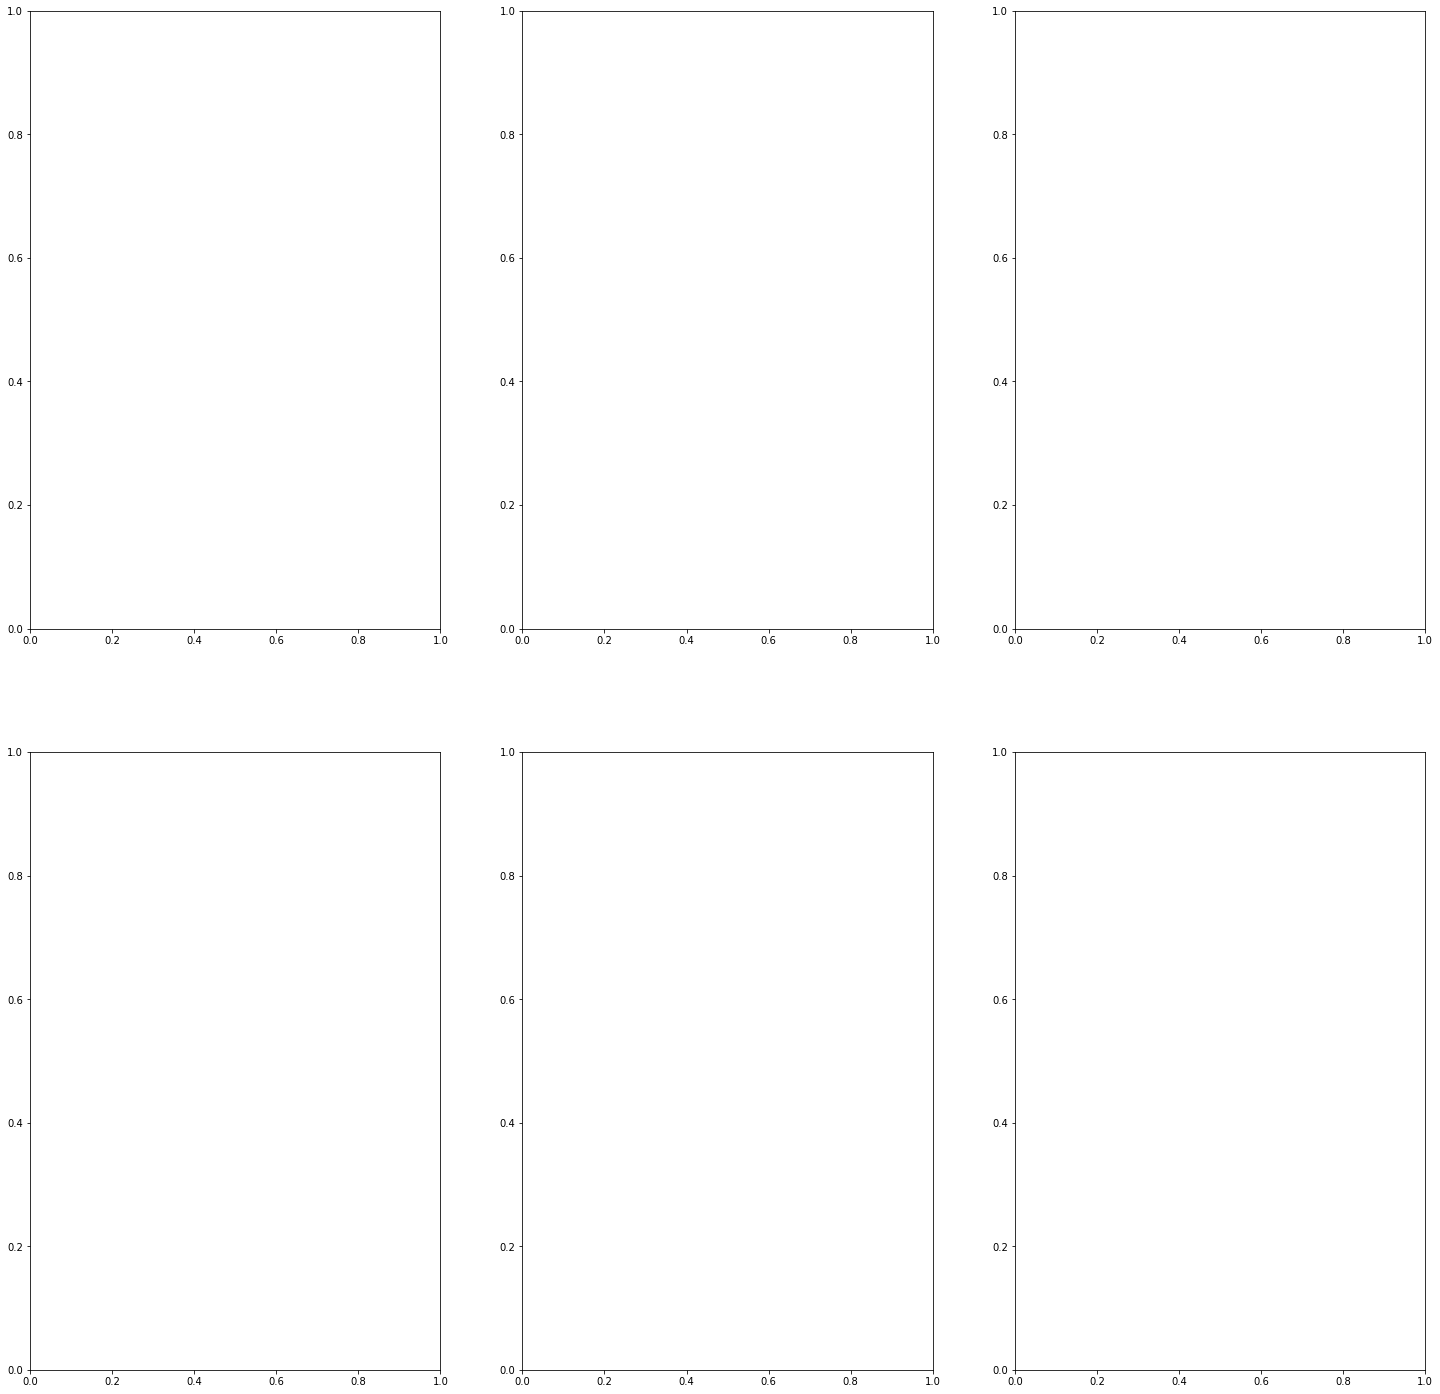

In [ ]:
axes = ('ax0', 'ax1', 'ax2', 'ax3', 'ax4', 'ax5', 'ax6')
fig, axes = plt.subplots(2,3, figsize=(25, 25))

for level, ax in zip(levels, axes):
    print(level, ax)

<ErrorbarContainer object of 3 artists>

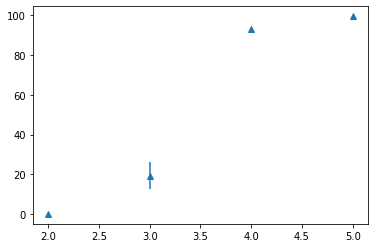

In [ ]:
x = df_results.loc['BendersOCT', level].index
y = df_results.loc[('BendersOCT', level), 'mean_gap']
e = df_results.loc[('BendersOCT', level), 'std_gap']
plt.errorbar(x, y, e, linestyle = 'None', marker = '^')

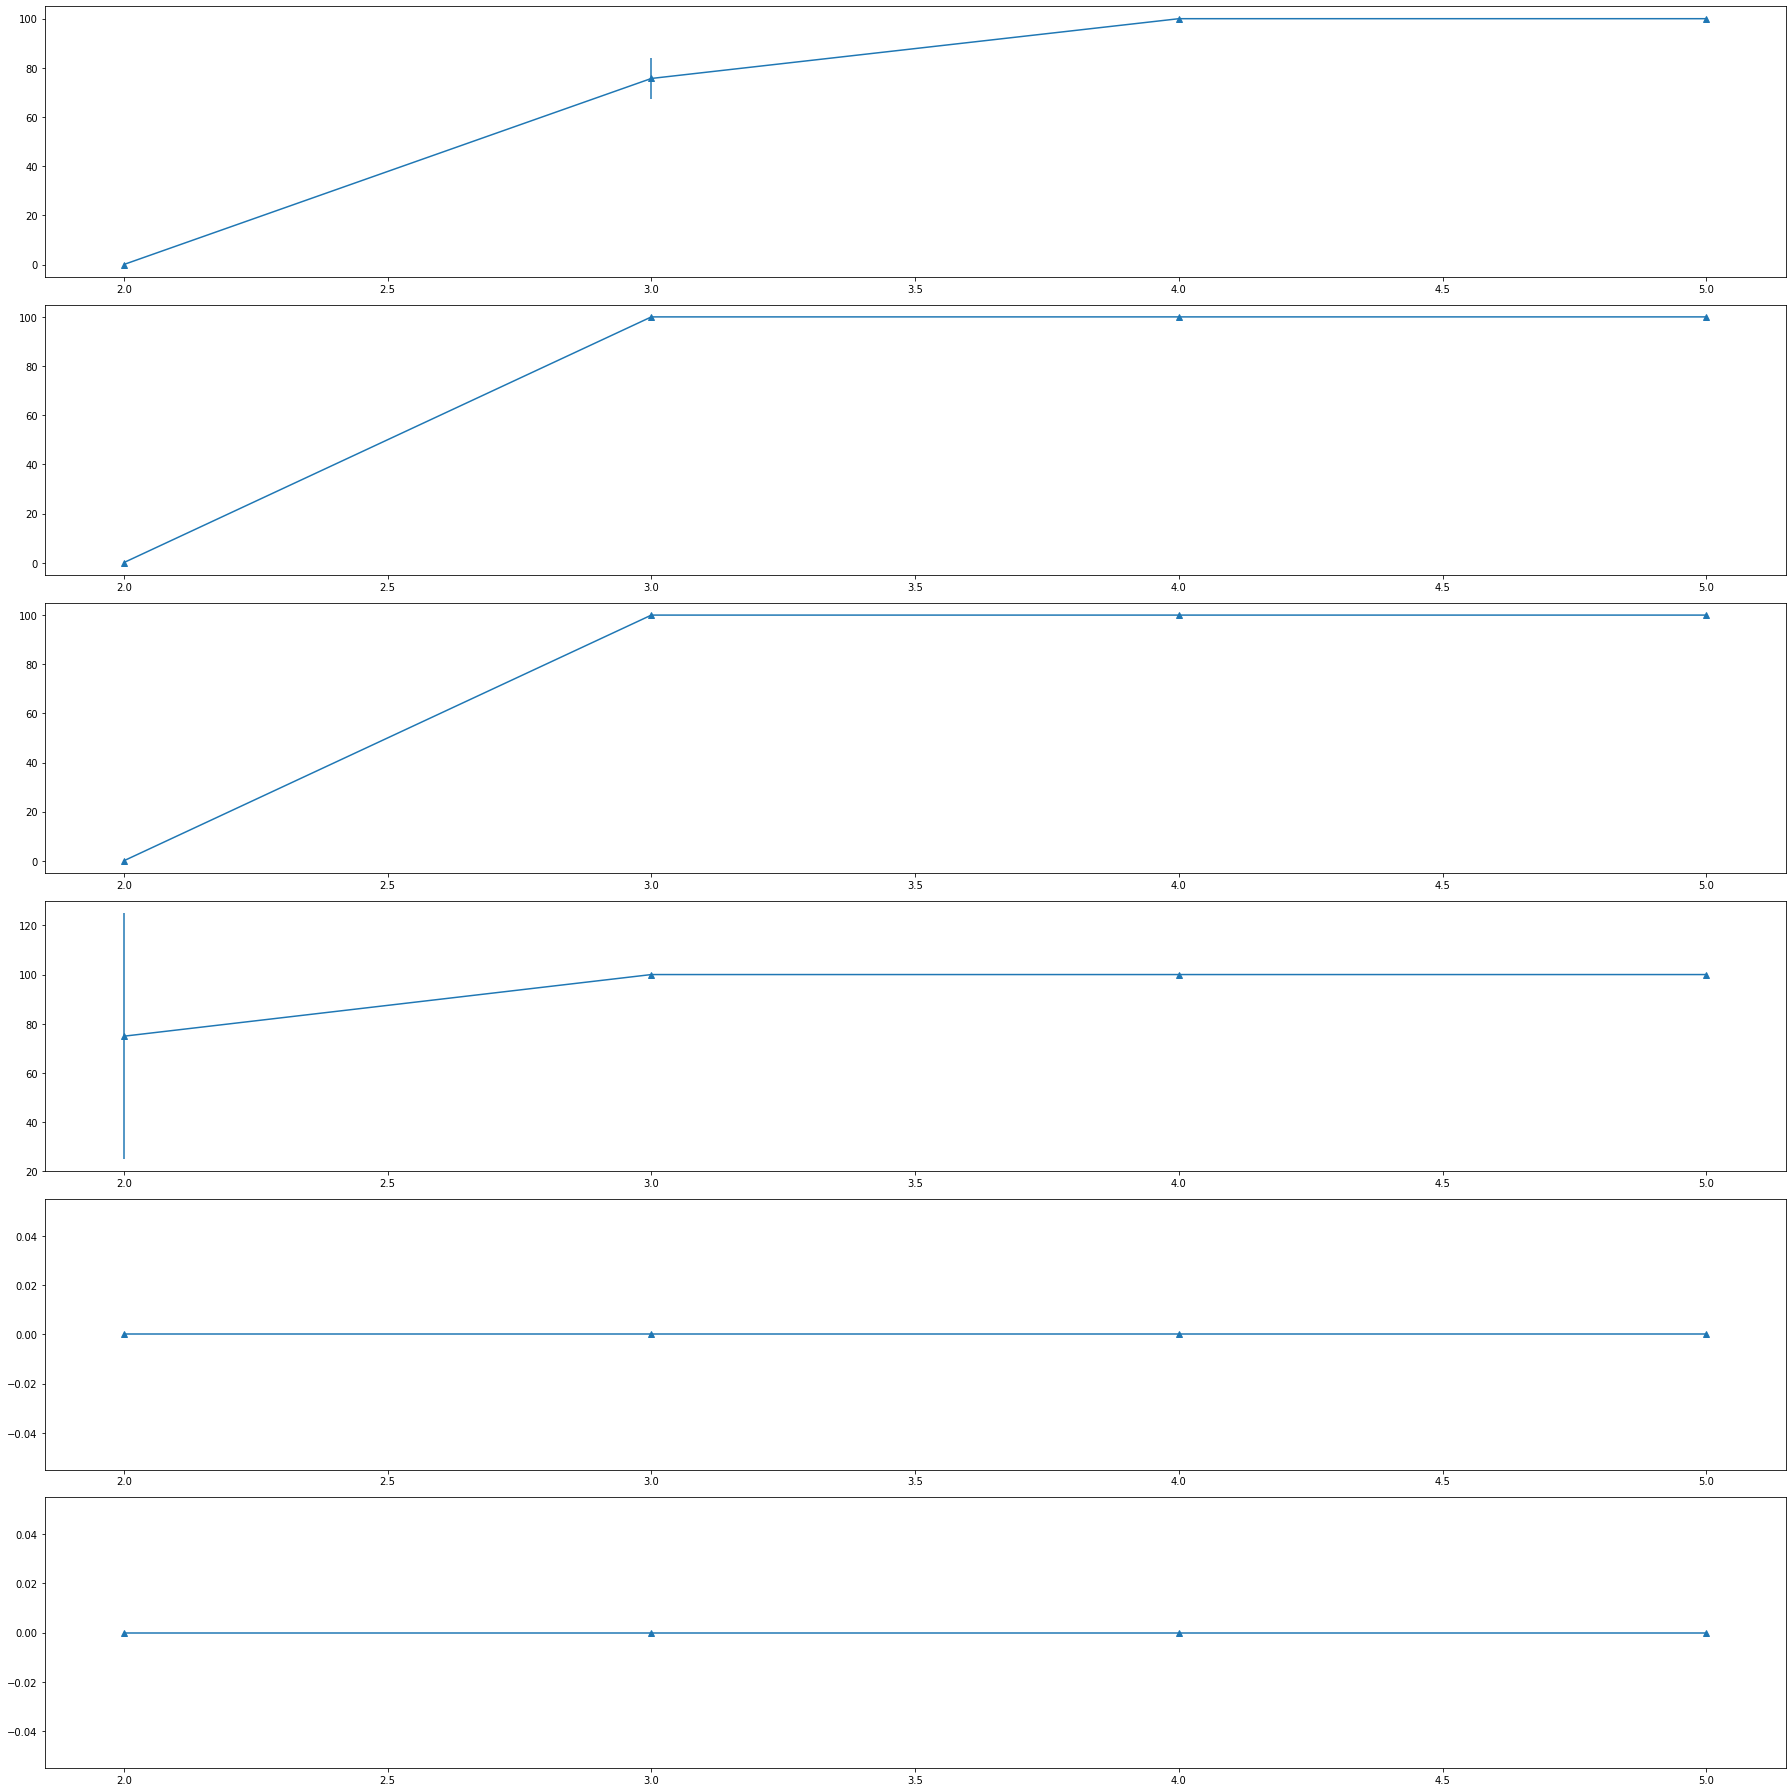

In [ ]:
levels = df_results.loc['binOCT'].index.levels[0]
axes = ('ax0', 'ax1', 'ax2', 'ax3', 'ax4', 'ax5', 'ax6')
fig, axes = plt.subplots(len(levels), figsize=(25, 25))

for level, ax in zip(levels, axes):
    x = df_results.loc['binOCT', level].index
    y = df_results.loc[('binOCT', level), 'mean_gap']
    e = df_results.loc[('binOCT', level), 'std_gap']
    ax.errorbar(x, y, e, marker = '^')
plt.tight_layout()
plt.show()